In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import Birch
from sklearn import datasets

In [106]:
def myPlotClustering(X, plt_labels, centers=None):
    plt_K = np.unique(plt_labels).size
    c = ['b','g','r','c','m','y','k','w']
#     if(len(c) < plt_K):
#         print('To many labels')
#         return
    for k in range(plt_K):
        mask = (plt_labels == k)
        plt.plot(X[mask, 0], X[mask, 1], 'o')
    if centers != None:
        plt.plot(centers[:, 0], centers[:, 1], 'ko')
    plt.show()

In [67]:
help(birch)

Help on Birch in module sklearn.cluster.birch object:

class Birch(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin, sklearn.base.ClusterMixin)
 |  Implements the Birch clustering algorithm.
 |  
 |  Every new sample is inserted into the root of the Clustering Feature
 |  Tree. It is then clubbed together with the subcluster that has the
 |  centroid closest to the new sample. This is done recursively till it
 |  ends up at the subcluster of the leaf of the tree has the closest centroid.
 |  
 |  Read more in the :ref:`User Guide <birch>`.
 |  
 |  Parameters
 |  ----------
 |  threshold : float, default 0.5
 |      The radius of the subcluster obtained by merging a new sample and the
 |      closest subcluster should be lesser than the threshold. Otherwise a new
 |      subcluster is started.
 |  
 |  branching_factor : int, default 50
 |      Maximum number of CF subclusters in each node. If a new samples enters
 |      such that the number of subclusters exceed the branchin

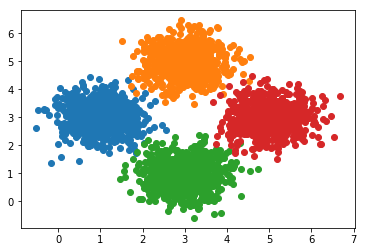

In [101]:
centers_ = [[1, 3], [3, 5], [3, 1], [5, 3]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)
myPlotClustering(X, labels)

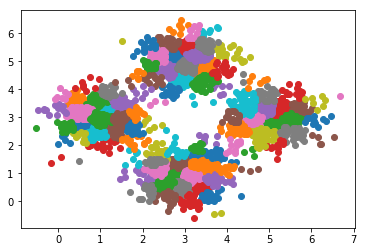

In [103]:
birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(X)
myPlotClustering(X, birch.labels_)

/home/dominik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  # Remove the CWD from sys.path while we load stuff.


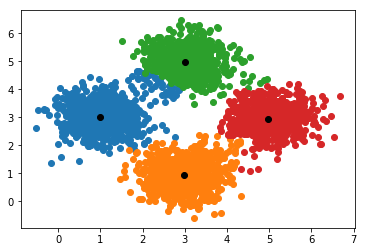

(4, 2)
(3000, 107)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106]


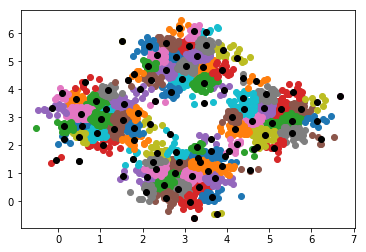

In [111]:
birch = Birch(threshold=0.25, n_clusters=4)
birch.fit(X)
myPlotClustering(X, birch.labels_,birch.root_.centroids_)
print(birch.root_.centroids_.shape)
Y = birch.transform(X)
print(Y.shape)
globalLabels = np.argmin(Y,axis=1)
print(np.unique(globalLabels))
myPlotClustering(X,globalLabels, birch.subcluster_centers_)

In [119]:
for i in range(len(birch.root_.subclusters_)):
    clust = birch.root_.subclusters_[i]
    print(clust.child_.is_leaf)

True
True
True
True
